<a href="https://colab.research.google.com/github/alexndremelyanov/_/blob/main/L4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
class LinearRegressionGD:
    def __init__(self, lr=0.01, max_iter=1000, tol=1e-3, intercept = True):
        # скорость обучения градиентного спуска
        self.learning_rate = lr
        # максимальное число итераций
        self.max_iteration = max_iter
        # критерий сходимости
        self.tolerance_convergence  = tol
        # наличие свободного члена
        self.intercept = intercept
        # инициальзация весов: None
        self.theta = None
        self.n = None
        self.d = None

    def fit(self, X, y):
        self.X = X.copy()
        if self.intercept:
            self.X = np.hstack((np.ones((self.X.shape[0], 1)), self.X))
        # размерность вектора X
        self.n, self.d = self.X.shape
        # инициализация случайных весов
        self.theta = np.random.randn(self.d)
        steps, errors = [], []
        step = 0
        for _ in range(self.max_iteration):
            grad = self.gradient(self.X, y)
            self.theta -= self.learning_rate * grad
            new_error = ((y - self.predict(X)).T @ (y - self.predict(X))) / self.n
            step += 1
            steps.append(step)
            errors.append(new_error)
            # проверка сходимости
            if np.linalg.norm(grad) < self.tolerance_convergence:
                break
        return steps, errors

    def gradient(self, X, y):
        return X.T @ (X @ self.theta - y) / len(y)

    def predict(self, X):
        if self.intercept:
            X_ = np.hstack((np.ones((X.shape[0],1)), X))
        else:
            X_ = X
        return X_ @ self.theta

    def MSE(self, X, y):
        return ((y - self.predict(X)).T @ (y - self.predict(X))) / len(y)

    def MAE(self, X, y):
        return abs(y - self.predict(X)).mean()

    def MAPE(self, X, y):
        return abs((y - self.predict(X))/y).mean()

Время обучения: 0.016918182373046875
MSE:  3.945357620118155
Коэффициенты:  [5.65587543 0.82182318 1.93445421 3.13726843 3.65803346 4.92895564]


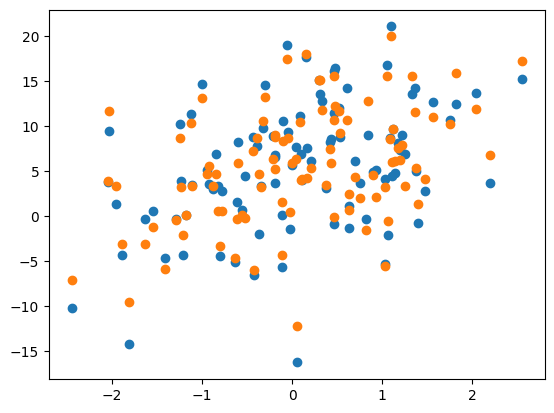

In [3]:
X = np.random.randn(100, 5)
y = X @ np.array([1, 2, 3, 4, 5]) + np.random.randn(100) * 2 + 6

start_time = time.time()
modelGD = LinearRegressionGD(lr=0.01, max_iter=400, tol=1e-3, intercept = True)
steps, errors = modelGD.fit(X, y)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
y_pred = modelGD.predict(X)
print("MSE: ", modelGD.MSE(X, y))
print("Коэффициенты: ", modelGD.theta)
_ =plt.scatter(X[:,2], y)
_ =plt.scatter(X[:,2], y_pred)

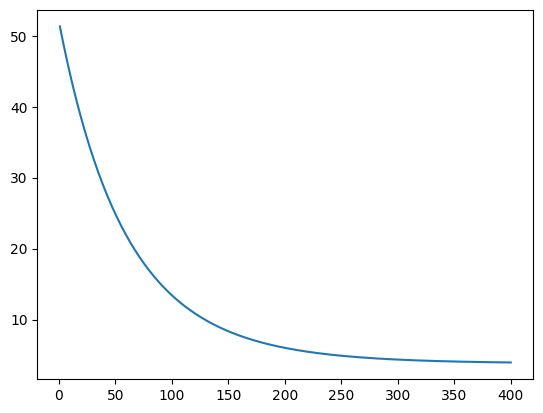

In [4]:
fig = plt.plot(steps, errors)

In [5]:
class LinearRegressionSGD:
    def __init__(self, lr=0.01, max_iter=1000, batch_size=32, tol=1e-3, intercept = True):
        # скорость обучения градиентного спуска
        self.learning_rate = lr
        # максимальное число итераций
        self.max_iteration = max_iter
        # размер мини-батча
        self.batch_size = batch_size
        # критерий сходимости
        self.tolerance_convergence  = tol
        # наличие свободного члена
        self.intercept = intercept
        # инициальзация весов: None
        self.theta = None
        self.n = None
        self.d = None

    def fit(self, X, y):
        self.X = X.copy()
        self.y = y.copy()
        if self.intercept:
            self.X = np.hstack((np.ones((self.X.shape[0], 1)), self.X))
        # размерность вектора X
        self.n, self.d = self.X.shape
        # инициализация случайных весов
        self.theta = np.random.randn(self.d)
        steps, errors = [], []
        step = 0
        for _ in range(self.max_iteration):
            # перемешивание данных
            indices = np.random.permutation(self.n)
            X = self.X[indices]
            y = self.y[indices]
            # цикл по мини-батчам
            for i in range(0, self.n, self.batch_size):
                X_batch = X[i:i+self.batch_size]
                y_batch = y[i:i+self.batch_size]
                grad = self.gradient(X_batch, y_batch)
                self.theta -= self.learning_rate * grad
            new_error = ((self.y - self.X @ self.theta).T @ (self.y - self.X @ self.theta)) / self.n
            step += 1
            steps.append(step)
            errors.append(new_error)
            # проверка сходимости
            if np.linalg.norm(grad) < self.tolerance_convergence:
                break
        return steps, errors

    def gradient(self, X, y):
        return X.T @ (X @ self.theta - y) / len(y)

    def predict(self, X):
        if self.intercept:
            X_ = np.hstack((np.ones((X.shape[0],1)), X))
        else:
            X_ = X
        return X_ @ self.theta

    def MSE(self, X, y):
        return ((y - self.predict(X)).T @ (y - self.predict(X))) / len(y)

    def MAE(self, X, y):
        return abs(y - self.predict(X)).mean()

    def MAPE(self, X, y):
        return abs((y - self.predict(X))/y).mean()

Время обучения: 0.01078939437866211
MSE:  3.80963113921783
Коэффициенты:  [5.79670487 1.01713519 1.975653   3.21886223 3.84002308 5.11271433]


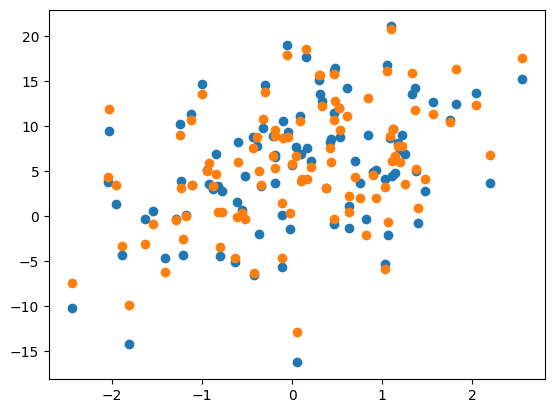

In [6]:
start_time = time.time()
modelSGD = LinearRegressionSGD(lr=0.01, max_iter=50, batch_size=8, tol=1e-3, intercept = True)
steps, errors = modelSGD.fit(X, y)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
y_pred = modelSGD.predict(X)
print("MSE: ", np.mean((y_pred - y) ** 2))
print("Коэффициенты: ", modelSGD.theta)
_ = plt.scatter(X[:,2], y)
_ = plt.scatter(X[:,2], y_pred)

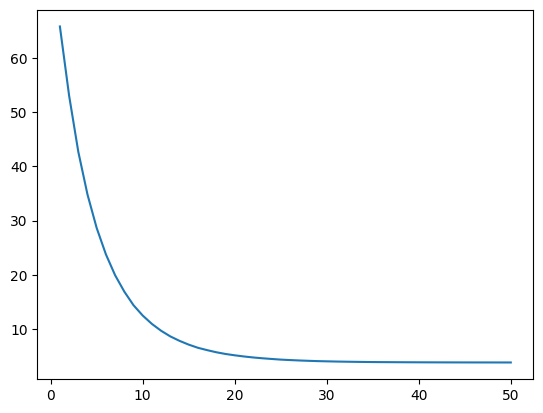

In [7]:
fig = plt.plot(steps, errors)

In [8]:
def train_test_split_(x, y, test_size=0.2, random_state=None):
    data = np.concatenate((x, y.reshape(y.shape[0],1)), axis=1)
    # Задаем seed для воспроизводимости результатов, если указан random_state
    if random_state is not None:
        np.random.seed(random_state)

    # Вычисляем количество элементов для тестовой выборки
    num_test = int(len(data) * test_size)

    # Случайно перемешиваем индексы
    shuffled_indices = np.random.permutation(len(data))

    # Выбираем индексы для тестовой выборки
    test_indices = shuffled_indices[:num_test]

    # Выбираем индексы для обучающей выборки
    train_indices = shuffled_indices[num_test:]

    # Разделяем данные на обучающую и тестовую выборки
    train_data = data[train_indices]
    test_data = data[test_indices]

    return train_data[:,:-1], train_data[:,-1], test_data[:,:-1], test_data[:,-1]

In [9]:
from sklearn import datasets
import pandas as pd
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data)
df.columns = diabetes.feature_names

# Создание нового столбца, содержащего целевую переменную 'y'
# (количественный показатель прогрессирования заболевания
# через год после исходного уровня)
df['diabetes_measure'] = diabetes.target
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print(df.head())
x_train, y_train, x_test, y_test = train_test_split_(X, y, test_size = 0.3, random_state = 123)
x_train1 = np.hstack((np.ones((x_train.shape[0], 1)), x_train))
x_test1 = np.hstack((np.ones((x_test.shape[0], 1)), x_test))


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  diabetes_measure  
0 -0.002592  0.019907 -0.017646             151.0  
1 -0.039493 -0.068332 -0.092204              75.0  
2 -0.002592  0.002861 -0.025930             141.0  
3  0.034309  0.022688 -0.009362             206.0  
4 -0.002592 -0.031988 -0.046641             135.0  


l, MSE_test - MSE_train:
1e-20 99.62520656137531
2.5353644939701167e-20 99.62520656137531
6.428073117284345e-20 99.62520656137531
1.6297508346206402e-19 99.62520656137531
4.1320124001153346e-19 99.62520656137531
1.0476157527896661e-18 99.62520656137531
2.6560877829466947e-18 99.62520656137531
6.734150657750801e-18 99.62520656137531
1.7073526474706886e-17 99.62520656137531
4.328761281083062e-17 99.62520656137531
1.097498765493059e-16 99.62520656137485
2.782559402207126e-16 99.62520656137985
7.054802310718631e-16 99.62520656137713
1.788649529057435e-15 99.62520656137667
4.534878508128591e-15 99.62520656137576
1.1497569953977357e-14 99.62520656137576
2.9150530628251696e-14 99.62520656136849
7.390722033525775e-14 99.62520656135894
1.8738174228603867e-13 99.62520656133256
4.750810162102794e-13 99.6252065612639
1.2045035402587836e-12 99.62520656109564
3.0538555088334124e-12 99.62520656066226
7.742636826811278e-12 99.62520655956223
1.9630406500402685e-11 99.6252065567819
4.977023564332114e-11

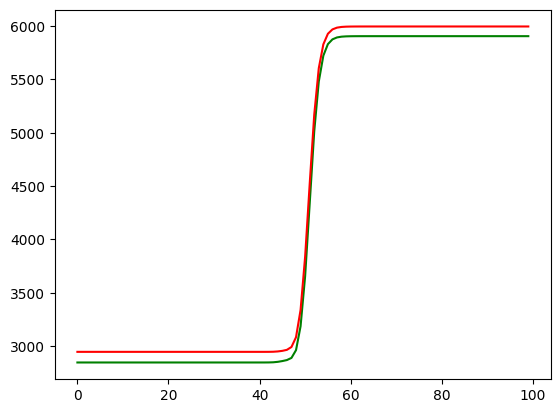

In [10]:
train_scores, test_scores = [], []
id = np.eye(x_train.shape[1]+1)
id[0][0] = 0
print("l, MSE_test - MSE_train:")
for l in np.logspace(-20, 20, 100):
    w = np.linalg.inv(x_train1.T @ x_train1 + l*id) @ x_train1.T @ y_train
    MSE_train = (y_train - x_train1 @ w).T @ (y_train - x_train1 @ w)/ x_train1.shape[0]
    train_scores.append(MSE_train)
    MSE_test = (y_test - x_test1 @ w).T @ (y_test - x_test1 @ w)/ x_test1.shape[0]
    test_scores.append(MSE_test)
    print(l, MSE_test - MSE_train)
plt.plot(train_scores, 'g')
plt.plot(test_scores, 'r')

start_time = time.time()
w = np.linalg.inv(x_train1.T @ x_train1 + 0.038*id) @ x_train1.T @ y_train
MSE_train = (y_train - x_train1 @ w).T @ (y_train - x_train1 @ w)/ x_train1.shape[0]
MSE_test = (y_test - x_test1 @ w).T @ (y_test - x_test1 @ w)/ x_test1.shape[0]
print("Время обучения:", time.time() - start_time)
print("MSE_train, MSE_test", MSE_train, MSE_test)
print("Коэффициенты: ", w)
print("np.linalg.det(x_train.T @ x_train): ", np.linalg.det(x_train1.T @ x_train1))
print("np.linalg.det(x_train.T @ x_train + 0.43287*id): ", np.linalg.det(x_train1.T @ x_train1 + 0.43287*id))

Время обучения: 0.19418716430664062
MSE_train:  3060.3749576883124
MSE_test:  3187.0956124244867
Коэффициенты:  [ 152.69076152   42.39985986  -97.23634027  374.87515265  217.48366499
   -7.98664919  -39.07988943 -191.9602773   161.10082192  284.13524376
  158.81117188]


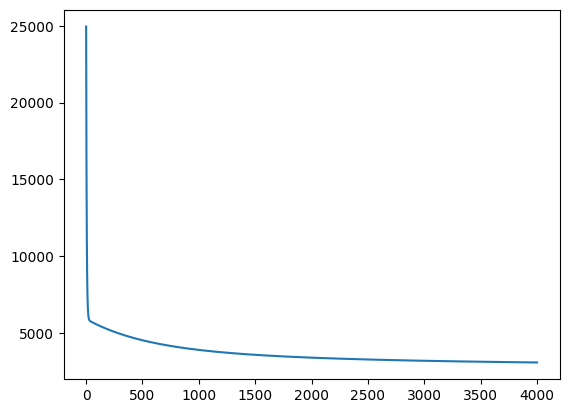

In [11]:
start_time = time.time()
modelGD = LinearRegressionGD(lr=0.1, max_iter=4000, tol=1e-3, intercept = True)
steps, errors = modelGD.fit(x_train, y_train)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
print("MSE_train: ", modelGD.MSE(x_train, y_train))
print("MSE_test: ", modelGD.MSE(x_test, y_test))
print("Коэффициенты: ", modelGD.theta)
plt.plot(steps, errors)

Время обучения: 0.12373828887939453
MSE_train:  2874.4625442680485
MSE_test:  2959.6134711331865
Коэффициенты:  [ 151.5491199    13.4797293  -242.17776999  533.74946446  266.9014214
  -74.58966891 -117.80983904 -206.82247501  169.24586581  390.33279364
  120.62468385]


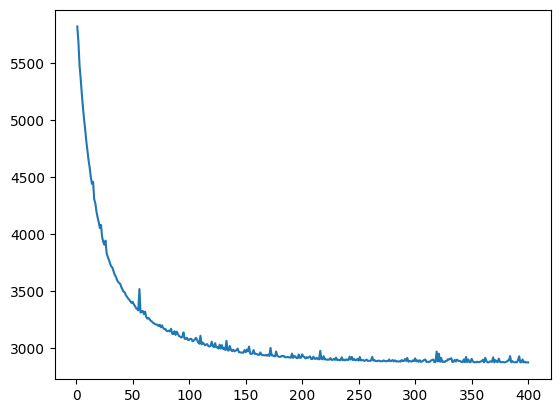

In [12]:
start_time = time.time()
modelSGD = LinearRegressionSGD(lr=0.1, max_iter=400, batch_size=8, tol=1e-3, intercept = True)
steps, errors = modelSGD.fit(x_train, y_train)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
print("MSE_train: ", modelSGD.MSE(x_train, y_train))
print("MSE_test: ", modelSGD.MSE(x_test, y_test))
print("Коэффициенты: ", modelSGD.theta)
plt.plot(steps, errors)

Время обучения: 13.016969203948975
MSE_train:  2849.01077999237
MSE_test:  2952.885736059851
Коэффициенты:  [ 154.02469695    9.47128162 -261.28918569  540.27139365  275.24277731
 -810.919927    441.85906458  135.59908348  294.83540483  669.61255537
  101.81578562]


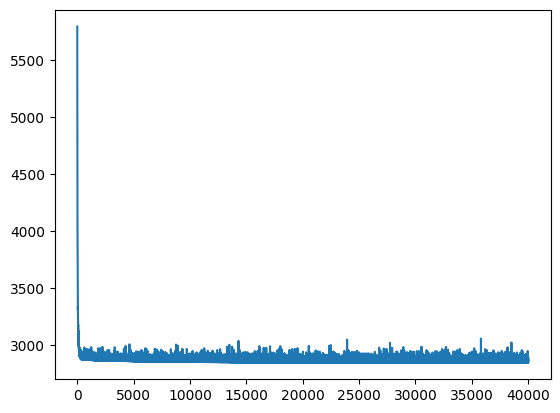

In [13]:
start_time = time.time()
modelSGD = LinearRegressionSGD(lr=0.1, max_iter=40000, batch_size=8, tol=1e-3, intercept = True)
steps, errors = modelSGD.fit(x_train, y_train)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
print("MSE_train: ", modelSGD.MSE(x_train, y_train))
print("MSE_test: ", modelSGD.MSE(x_test, y_test))
print("Коэффициенты: ", modelSGD.theta)
plt.plot(steps, errors)

Время обучения: 5.051236152648926
MSE_train:  2852.2669089085066
MSE_test:  2948.138277741099
Коэффициенты:  [ 151.66734708   12.01036411 -259.01464652  545.45094896  272.58958392
 -501.5664655   193.26467017    3.31623893  262.40277703  553.35872218
  102.0380112 ]


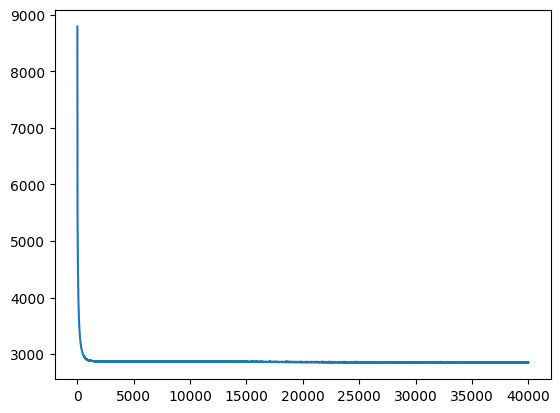

In [14]:
start_time = time.time()
modelSGD = LinearRegressionSGD(lr=0.1, max_iter=40000, batch_size=32, tol=1e-3, intercept = True)
steps, errors = modelSGD.fit(x_train, y_train)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
print("MSE_train: ", modelSGD.MSE(x_train, y_train))
print("MSE_test: ", modelSGD.MSE(x_test, y_test))
print("Коэффициенты: ", modelSGD.theta)
plt.plot(steps, errors)

Видим, что у стохастического градиентного спуска качество выше, разрыв в качестве на обучающей и тестовой выборке меньше, время выполнения меньше, и чем у обычного градиентного спуска, и чем у прямых вычислений с L2-регуляризацией! При этом стохастический градиентный спуск работает более "шумно". Многое зависит и от оптимального подбора размера мини-батча.

<b>Домашнее задание</b>

**Объясните, почему коэффициенты всех построенных моделей сильно отличаются между собой.**

**1. Использование разных методов:** В вашем коде мы используем метод градиентного спуска и стохастический градиентный спуск. Каждый из этих методов имеет свои особенности и может привести к разным результатам.

**2. Разные параметры обучения:** при неизменной скорости обучения (lr) мы настраивали различное количество иттераций (400 и 50).
Также при стохастическом градиентном спуске задали величину batch_size (8), то есть разбили выборку по 8 единиц. При GD на обчучение мы подаём всю выборку, а при SGD подаём её по частям в рандомном порядке, что увеличивает скорость сходимости, поэтому уменьшилось количество итераций.
На последних моделях мы реализовывали SGD с разными параметрами. Видна такая ситуация: точность прямо пропорциональна увеличению размеру батча и обратно пропорциональна количеству итераций.

**3. Регуляризация** вводит штрафы на большие значения коэффициентов, что может привести к различиям в их значениях.

**4. Случайность:** некоторые параметры обучения (например, инициализация случайных весов и перемешивание данных в методе SGD) могут внести случайные вариации в процесс обучения, что влияет на коэффициенты.

**Сравните скорость и качество обучения моделей регрессии с помощью обычного и стохастического градиентного спуска на наборе данных housing.csv.**

In [15]:
DataFrame = pd.read_csv('housing.csv')
y = DataFrame['Y']
x = DataFrame.drop('Y', axis=1)

y = y.to_numpy().reshape(-1, 1)
x_train, y_train, x_test, y_test = train_test_split_(x, y, test_size=0.2, random_state=42)

Время обучения: 0.5401303768157959
MSE_train:  19.14942881120893
MSE_test:  21.435195259064415
Коэффициенты:  [11.05740125 -0.55823843  1.70081677  3.39920555  0.73420096  0.97171374
  8.93296129  2.15742353 -2.46116329  1.82386424  1.21292916 -0.06158022
  6.09144337 -2.69711383 -1.83744647  0.59633915 -1.3028441  -0.42328711
 -1.06017276 -0.90889745 -2.14007811  1.04477129 -1.87112601  0.93334829
 -1.7006853   0.1225669  -0.45303883 -1.07079802 -1.17889893  2.07403875
  0.80681951  1.79784599 -2.33947121  0.88087815  1.86404362  1.57394167
 -1.07816229  1.11280084 -0.09821054  0.53268979  0.58251076  0.37860439
  0.8732308  -0.35104843 -1.55700495  1.18332783  1.79519169 -2.3033203
 -2.24788167 -1.06521578 -0.19952002 -1.55304413  0.2769698   1.15003597
 -0.0857723   2.33343646  0.34857404 -2.56760408  1.75931051  0.45017251
 -2.51579932  0.12510609 -0.86880486  1.07981677 -0.61657982 -0.9659668
 -1.98849008 -0.96450447 -3.19868707  9.30447171  2.70829811  0.89355352
 -1.46826858 -2.

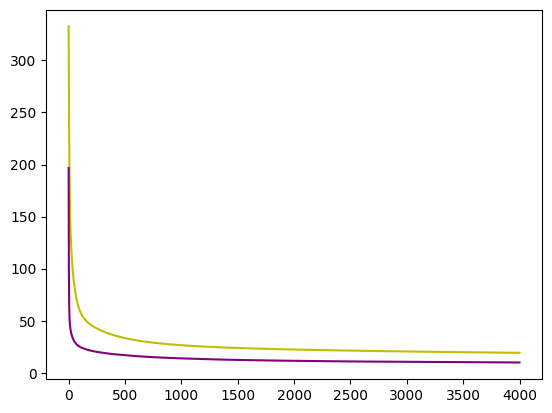

In [16]:
start_time = time.time()
modelGD = LinearRegressionGD(lr=0.01, max_iter=4000, tol=1e-3, intercept = True)
stepsGD, errorsGD = modelGD.fit(x_train, y_train)
print("Время обучения:", time.time() - start_time)
print("MSE_train: ", modelGD.MSE(x_train, y_train))
print("MSE_test: ", modelGD.MSE(x_test, y_test))
print("Коэффициенты: ", modelGD.theta)
plt.plot(stepsGD, errorsGD, 'y')

start_time = time.time()
modelSGD = LinearRegressionSGD(lr=0.01, max_iter=4000, batch_size=32, tol=1e-3, intercept = True)
stepsSGD, errorsSGD = modelSGD.fit(x_train, y_train)
print("Время обучения:", time.time() - start_time)
print("MSE_train: ", modelSGD.MSE(x_train, y_train))
print("MSE_test: ", modelSGD.MSE(x_test, y_test))
print("Коэффициенты: ", modelSGD.theta)
plt.plot(stepsSGD, errorsSGD, 'purple')

**Подберите в цикле оптимальное, с Вашей точки зрения, значение размера мини-батча и поясните Ваш выбор.**

In [17]:
from sklearn.metrics import mean_squared_error

batch_sizes = [4, 8, 16, 32, 64, 128, 256, 512]
results = []

for batch_size in batch_sizes:
    print(f"Размер мини-батча: {batch_size}")
    start_time = time.time()
    modelSGD = LinearRegressionSGD(lr=0.01, max_iter=40000, batch_size=batch_size, tol=1e-3, intercept=True)
    steps, errors = modelSGD.fit(x_train, y_train)
    print("Время обучения:", time.time() - start_time)
    print("MSE_train: ", modelSGD.MSE(x_train, y_train))
    print("MSE_test: ", modelSGD.MSE(x_test, y_test))



Размер мини-батча: 4
Время обучения: 58.861260414123535
MSE_train:  5.785585453625072
MSE_test:  13.292353254799966
Размер мини-батча: 8
Время обучения: 32.662866830825806
MSE_train:  6.1295004083506885
MSE_test:  12.79103966629217
Размер мини-батча: 16
Время обучения: 17.981971979141235
MSE_train:  6.545207318266327
MSE_test:  11.986935307794766
Размер мини-батча: 32
Время обучения: 11.813521385192871
MSE_train:  7.043233251826349
MSE_test:  11.371529710843095
Размер мини-батча: 64
Время обучения: 8.951085090637207
MSE_train:  7.583786181424739
MSE_test:  11.104013369223352
Размер мини-батча: 128
Время обучения: 5.73378849029541
MSE_train:  8.218329152323479
MSE_test:  11.020846252618158
Размер мини-батча: 256
Время обучения: 6.9039201736450195
MSE_train:  9.12347058140252
MSE_test:  11.21343518142302
Размер мини-батча: 512
Время обучения: 4.260442733764648
MSE_train:  10.406285900473769
MSE_test:  11.851836805738692


При мини-батче равном 64 нам уже удалось достичь небольшого времени обучения и при этом хорошего качества модели

**Реализуйте в классе LinearRegressionSGD стохастический градиентный спуск с регуляризацией L1, L2, ElasticNet и подберите оптимальные параметры регуляризации, чтобы сократить разрыв качества на обучающей и тестовой выборке.**

In [18]:
class LinearRegressionSGD_REG:
    def __init__(self, lr=0.01, max_iter=1000, batch_size=32, tol=1e-3, intercept=True, alpha=0.01, l1_ratio=0.5):
        self.learning_rate = lr
        self.max_iteration = max_iter
        self.batch_size = batch_size
        self.tolerance_convergence = tol
        self.intercept = intercept
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        self.theta = None
        self.n = None
        self.d = None

    def fit(self, X, y):
        self.X = X.copy()
        self.y = y.copy()
        if self.intercept:
            self.X = np.hstack((np.ones((self.X.shape[0], 1)), self.X))
        self.n, self.d = self.X.shape
        self.theta = np.random.randn(self.d)
        steps, errors = [], []
        step = 0

        for _ in range(self.max_iteration):
            indices = np.random.permutation(self.n)
            X = self.X[indices]
            y = self.y[indices]
            for i in range(0, self.n, self.batch_size):
                X_batch = X[i:i + self.batch_size]
                y_batch = y[i:i + self.batch_size]
                grad = self.gradient(X_batch, y_batch)
                self.theta -= self.learning_rate * grad

            self.regularization()

            new_error = ((self.y - self.X @ self.theta).T @ (self.y - self.X @ self.theta)) / self.n
            step += 1
            steps.append(step)
            errors.append(new_error)

            if np.linalg.norm(grad) < self.tolerance_convergence:
                break
        return steps, errors

    def gradient(self, X, y):
        return X.T @ (X @ self.theta - y) / len(y)

    def predict(self, X):
        if self.intercept:
            X_ = np.hstack((np.ones((X.shape[0], 1)), X))
        else:
            X_ = X
        return X_ @ self.theta

    def MSE(self, X, y):
        return ((y - self.predict(X)).T @ (y - self.predict(X))) / len(y)

    def MAE(self, X, y):
        return abs(y - self.predict(X)).mean()

    def MAPE(self, X, y):
        return abs((y - self.predict(X)) / y).mean()

    def regularization(self):
        if self.l1_ratio == 0:
            # L2 регуляризация
            self.theta[1:] -= 2 * self.alpha * self.theta[1:]
        elif self.l1_ratio == 1:
            # L1 регуляризация
            self.theta[1:] -= self.alpha * np.sign(self.theta[1:])
        else:
            # ElasticNet
            self.theta[1:] -= (self.alpha * self.l1_ratio * np.sign(self.theta[1:]) + self.alpha * (1 - self.l1_ratio) * 2 * self.theta[1:])

Время обучения SGD_REG: 1.0738584995269775
MSE_train:  10.406285900473769
MSE_test:  11.851836805738692


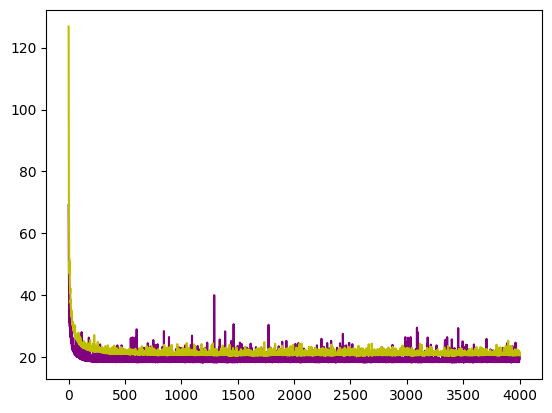

In [19]:
y = DataFrame['Y']
x =  DataFrame.drop('Y', axis=1)

y = y.to_numpy().reshape(-1, 1)
x_train, y_train, x_test, y_test = train_test_split_(x, y, test_size=0.2, random_state=42)

start_time = time.time()
modelSGD_REG = LinearRegressionSGD_REG(lr=0.1, max_iter=4000, batch_size=64, tol=1e-3, intercept=True, alpha=0.01, l1_ratio=0.5)
steps1, errors1 = modelSGD_REG.fit(x_train, y_train)
steps2, errors2 = modelSGD_REG.fit(x_test, y_test)
print('Время обучения SGD_REG:', time.time() - start_time)
#y_pred_SGD_REG = modelSGD_REG.predict(x_test)
#print('MSE SGD_REG:',np.mean((y_pred_SGD_REG - y_test) ** 2))

print("MSE_train: ", modelSGD.MSE(x_train, y_train))
print("MSE_test: ", modelSGD.MSE(x_test, y_test))


plt.plot(steps1, errors1, 'purple')
plt.plot(steps2, errors2, 'y')
plt.show()